# Content-based recommender system

## Europe Top 10 Attractions

### This notebook uses the EuropeTop100Attractions_ENG_20190101_20210821 dataset
Content-based recommendations systems recommend atractions that are similar to atractions previously visited by other customers. The models used in content-based recommender systems identify common features across user preferences based on the historical choices data of the user.

Develop a system to recommend attractions that similar users visited. For example, based on previous visits from all users, recommend an attraction to go together with a another attraction.


In [1]:
# Packages
import os
import numpy as np
import pandas as pd
import openpyxl
import re
from sklearn.metrics import pairwise 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Distances functions
from sklearn.metrics import pairwise_distances

In [3]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [4]:
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 10
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 10
heatmaps_text_fontSize = 8

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

In [5]:
# Load data 
ds = pd.read_excel('EuropeTop100Attractions_ENG_20190101_20210821.xlsx', engine='openpyxl')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92120 entries, 0 to 92119
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            92120 non-null  object        
 1   extractionDate     92120 non-null  datetime64[ns]
 2   globalRating       92120 non-null  float64       
 3   positionOnRanking  92120 non-null  int64         
 4   sitesOnRanking     92120 non-null  int64         
 5   totalReviews       92120 non-null  int64         
 6   userName           92120 non-null  object        
 7   userLocation       78652 non-null  object        
 8   userContributions  92120 non-null  int64         
 9   tripType           63052 non-null  object        
 10  reviewWritten      92120 non-null  datetime64[ns]
 11  reviewVisited      91410 non-null  datetime64[ns]
 12  reviewRating       92120 non-null  int64         
 13  reviewLanguage     92120 non-null  object        
 14  review

In [6]:
# Reformat variable types
cols = ['localID','userName','userLocation','tripType','reviewLanguage','reviewFullText']
ds[cols] = ds[cols].astype(str)

In [7]:
# Summary statistics for all variables
ds.describe(include='all', datetime_is_numeric=True).T

count unique  \
localID              92120    100   
extractionDate       92120    NaN   
globalRating       92120.0    NaN   
positionOnRanking  92120.0    NaN   
sitesOnRanking     92120.0    NaN   
totalReviews       92120.0    NaN   
userName             92120  65786   
userLocation         92120  12614   
userContributions  92120.0    NaN   
tripType             92120      6   
reviewWritten        92120    NaN   
reviewVisited        91410    NaN   
reviewRating       92120.0    NaN   
reviewLanguage       92120      1   
reviewFullText       92120  85088   

                                                                 top   freq  \
localID                                                       MAG001   8309   
extractionDate                                                   NaN    NaN   
globalRating                                                     NaN    NaN   
positionOnRanking                                                NaN    NaN   
sitesOnRanking                                                   NaN    NaN   
totalReviews                                                     NaN    NaN   
userName                                       Malgorzata@Margo7850p     31   
userLocation                                                     nan  13468   
userContributions                                                NaN    NaN   
tripType                                                     Couples  31702   
reviewWritten                                                    NaN    NaN   
reviewVisited                                                    NaN    NaN   
reviewRating                                                     NaN    NaN   
reviewLanguage                                                    en  92120   
reviewFullText     Is a nice place to visit when you visit Barcel...      3   

                                            mean                         min  \
localID                                      NaN                         NaN   
extractionDate     2021-08-20 22:09:20.598932992  2021-08-20 08:24:40.077000   
globalRating                            4.485166                         4.0   
positionOnRanking                        3.91459                         1.0   
sitesOnRanking                        748.263537                         5.0   
totalReviews                        40556.601813                      5179.0   
userName                                     NaN                         NaN   
userLocation                                 NaN                         NaN   
userContributions                      477.52056                         0.0   
tripType                                     NaN                         NaN   
reviewWritten      2019-09-02 16:05:57.967868160         2019-01-01 00:00:00   
reviewVisited      2019-07-19 02:09:01.122415104         2015-10-01 00:00:00   
reviewRating                            4.578658                         1.0   
reviewLanguage                               NaN                         NaN   
reviewFullText                               NaN                         NaN   

                                             25%  \
localID                                      NaN   
extractionDate     2021-08-20 12:08:10.831000064   
globalRating                                 4.5   
positionOnRanking                            1.0   
sitesOnRanking                             154.0   
totalReviews                             14152.0   
userName                                     NaN   
userLocation                                 NaN   
userContributions                           20.0   
tripType                                     NaN   
reviewWritten                2019-05-11 00:00:00   
reviewVisited                2019-04-01 00:00:00   
reviewRating                                 4.0   
reviewLanguage                               NaN   
reviewFullText                               NaN   

                                             50% 

In [8]:
# Check products cardinality
usernameCount = ds['userName'].value_counts()
usernameCount

Malgorzata@Margo7850p                    31
KodoDrummer@KodoDrummer                  24
None                                     20
Michele AmicoüáÆüáπüáÆüáπüáÆüáπüáÆüáπ@micheleaQ8239JH    19
Dimitris L@750dimitrisl                  17
                                         ..
Mogoshadi S@mogoshadis                    1
Crystal Chris@CrystalPistol007            1
Grantley@GrantleyMorgan                   1
Burnsfun@Burnsfun                         1
czlido@czlido                             1
Name: userName, Length: 65786, dtype: int64

In [9]:
# Check products cardinality
userlocationCount = ds['userLocation'].value_counts()
userlocationCount

nan                        13468
London, UK                  3710
Melbourne, Australia         773
Sydney, Australia            736
New York City, NY            699
                           ...  
Teresopolis, RJ                1
Pittsworth, Australia          1
Scone, Australia               1
Berea, OH                      1
Elburg, The Netherlands        1
Name: userLocation, Length: 12614, dtype: int64

In [10]:
# Check products cardinality
tripTypeCount = ds['tripType'].value_counts()
tripTypeCount

Couples     31702
nan         29068
Family      13596
Friends     11759
Solo         5127
Business      868
Name: tripType, dtype: int64

## Data Preparation

In [11]:
#identify duplicate rows
duplicateRows = ds[ds.duplicated()]

In [12]:
#view duplicate rows
duplicateRows

Empty DataFrame
Columns: [localID, extractionDate, globalRating, positionOnRanking, sitesOnRanking, totalReviews, userName, userLocation, userContributions, tripType, reviewWritten, reviewVisited, reviewRating, reviewLanguage, reviewFullText]
Index: []

In [13]:
## figuring out if we can remove the outliers
ds['positionOnRanking'].value_counts()

1     38547
2     12821
3     11549
7      7026
8      5668
11     2885
4      2834
10     2362
6      2282
5      2223
12     1097
24      806
9       710
31      595
16      312
19      243
55      160
Name: positionOnRanking, dtype: int64

In [14]:
# removing rows from position on ranking 
ds =ds[ds['positionOnRanking']<=12]

In [15]:
ds['positionOnRanking'].value_counts()

1     38547
2     12821
3     11549
7      7026
8      5668
11     2885
4      2834
10     2362
6      2282
5      2223
12     1097
9       710
Name: positionOnRanking, dtype: int64

In [16]:
# checking for missing data,  creating bool series for missing data
bool_series = pd.isnull(ds['userLocation'])

In [17]:
# filtering data
# displaying data only with location = NaN
ds[bool_series]

Empty DataFrame
Columns: [localID, extractionDate, globalRating, positionOnRanking, sitesOnRanking, totalReviews, userName, userLocation, userContributions, tripType, reviewWritten, reviewVisited, reviewRating, reviewLanguage, reviewFullText]
Index: []

In [18]:
#Use the modal value to replace missing data in userLocation
ds['userLocation'].replace([np.nan], ds['userLocation'].mode()[0], inplace=True)
print(ds)

      localID          extractionDate  globalRating  positionOnRanking  \
0      MAG001 2021-08-20 08:24:40.077           4.5                  1   
1      MAG001 2021-08-20 08:24:40.097           4.5                  1   
2      MAG001 2021-08-20 08:24:40.117           4.5                  1   
3      MAG001 2021-08-20 08:24:40.147           4.5                  1   
4      MAG001 2021-08-20 08:24:40.159           4.5                  1   
...       ...                     ...           ...                ...   
92115  MAG100 2021-08-21 16:27:11.795           4.5                 11   
92116  MAG100 2021-08-21 16:27:11.893           4.5                 11   
92117  MAG100 2021-08-21 16:27:11.993           4.5                 11   
92118  MAG100 2021-08-21 16:27:12.086           4.5                 11   
92119  MAG100 2021-08-21 16:27:17.026           4.5                 11   

       sitesOnRanking  totalReviews                   userName  \
0                1186        163828      Maur

In [19]:
# display data where location previously = NaN
ds[bool_series]

Empty DataFrame
Columns: [localID, extractionDate, globalRating, positionOnRanking, sitesOnRanking, totalReviews, userName, userLocation, userContributions, tripType, reviewWritten, reviewVisited, reviewRating, reviewLanguage, reviewFullText]
Index: []

In [20]:
# checking for missing data review visited,  creating bool series for missing data
dv_series = pd.isnull(ds['reviewVisited'])

In [21]:
ds[dv_series]

localID          extractionDate  globalRating  positionOnRanking  \
78     MAG001 2021-08-20 08:25:18.941           4.5                  1   
624    MAG001 2021-08-20 08:30:40.273           4.5                  1   
841    MAG001 2021-08-20 08:33:01.027           4.5                  1   
850    MAG001 2021-08-20 08:33:06.518           4.5                  1   
3183   MAG001 2021-08-20 08:55:30.759           4.5                  1   
...       ...                     ...           ...                ...   
89332  MAG087 2021-08-21 15:58:48.146           4.0                  1   
89338  MAG087 2021-08-21 15:58:48.682           4.0                  1   
89339  MAG087 2021-08-21 15:58:48.774           4.0                  1   
89347  MAG087 2021-08-21 15:58:54.396           4.0                  1   
89355  MAG087 2021-08-21 15:58:59.810           4.0                  1   

       sitesOnRanking  totalReviews                 userName  \
78               1186        163828      thomas@thomasphunos   
624              1186        163828  Paolo616616@Paolo616616   
841              1186        163828    StevenK@stevenkoh9999   
850              1186        163828    Margarita@Margaritano   
3183             1186        163828   Andrew Jones@wigan1969   
...               ...           ...                      ...   
89332               5          6182      Jo P@I4996RBjoannap   
89338               5          6182            GMcC73@GMcC73   
89339               5          6182          CWXXXJH@CWXXXJH   
89347               5          6182          Lala L@LalaL827   
89355               5          6182       Remi@alexandraremi   

                 userLocation  userContributions tripType reviewWritten  \
78             Manchester, UK                  1      nan    2020-09-25   
624    Prague, Czech Republic                284      nan    2020-02-03   
841      Singapore, Singapore                172      nan    2020-01-08   
850                    Europe                 18      nan    2020-01-07   
3183                      nan                  2      nan    2019-09-05   
...                       ...                ...      ...           ...   
89332              Brough, UK                343      nan    2019-07-31   
89338           Cork, Ireland                 36      nan    2019-07-28   
89339         Berkhamsted, UK                 46      nan    2019-07-22   
89347             Alrewas, UK                 87      nan    2019-07-10   
89355                 England               2520      nan    2019-06-30   

      reviewVisited  reviewRating reviewLanguage  \
78              NaT             4             en   
624             NaT             5             en   
841             NaT             5             en   
850             NaT             4             en   
3183            NaT             1             en   
...             ...           ...            ...   
89332           NaT             5             en   
89338           NaT             4             en   
89339           NaT             5             en   
89347           NaT             3             en   
89355           NaT             4             en   

                                          reviewFullText  
78     Amazing place , now a days it was not very qui...  
624    Beautiful unfinished building, should be compl...  
841    A lifetime of designing and planning by the ar...  
850    Everybody suggest Sagrada Familia. I loved the...  
3183   Nice to look at from the outside, however I ha...  
...                                                  ...  
89332  Plenty to walk around and see and you can walk...  
89338  We spent a really enjoyable 4 hours there with...  
89339  Well worth signing up for one of the twice dai...  
89347  I cycled here in the morning, came off the mai...  
89355  ‚Ç¨9.5 per person per entry inclusive of carpark...  

[710 rows x 15 columns]

In [22]:
#Use the modal value to replace missing data in reviewvisited
ds['reviewVisited'].replace([np.nan], ds['reviewVisited'].mode()[0], inplace=True)

In [23]:
ds[dv_series]

localID          extractionDate  globalRating  positionOnRanking  \
78     MAG001 2021-08-20 08:25:18.941           4.5                  1   
624    MAG001 2021-08-20 08:30:40.273           4.5                  1   
841    MAG001 2021-08-20 08:33:01.027           4.5                  1   
850    MAG001 2021-08-20 08:33:06.518           4.5                  1   
3183   MAG001 2021-08-20 08:55:30.759           4.5                  1   
...       ...                     ...           ...                ...   
89332  MAG087 2021-08-21 15:58:48.146           4.0                  1   
89338  MAG087 2021-08-21 15:58:48.682           4.0                  1   
89339  MAG087 2021-08-21 15:58:48.774           4.0                  1   
89347  MAG087 2021-08-21 15:58:54.396           4.0                  1   
89355  MAG087 2021-08-21 15:58:59.810           4.0                  1   

       sitesOnRanking  totalReviews                 userName  \
78               1186        163828      thomas@thomasphunos   
624              1186        163828  Paolo616616@Paolo616616   
841              1186        163828    StevenK@stevenkoh9999   
850              1186        163828    Margarita@Margaritano   
3183             1186        163828   Andrew Jones@wigan1969   
...               ...           ...                      ...   
89332               5          6182      Jo P@I4996RBjoannap   
89338               5          6182            GMcC73@GMcC73   
89339               5          6182          CWXXXJH@CWXXXJH   
89347               5          6182          Lala L@LalaL827   
89355               5          6182       Remi@alexandraremi   

                 userLocation  userContributions tripType reviewWritten  \
78             Manchester, UK                  1      nan    2020-09-25   
624    Prague, Czech Republic                284      nan    2020-02-03   
841      Singapore, Singapore                172      nan    2020-01-08   
850                    Europe                 18      nan    2020-01-07   
3183                      nan                  2      nan    2019-09-05   
...                       ...                ...      ...           ...   
89332              Brough, UK                343      nan    2019-07-31   
89338           Cork, Ireland                 36      nan    2019-07-28   
89339         Berkhamsted, UK                 46      nan    2019-07-22   
89347             Alrewas, UK                 87      nan    2019-07-10   
89355                 England               2520      nan    2019-06-30   

      reviewVisited  reviewRating reviewLanguage  \
78       2019-09-01             4             en   
624      2019-09-01             5             en   
841      2019-09-01             5             en   
850      2019-09-01             4             en   
3183     2019-09-01             1             en   
...             ...           ...            ...   
89332    2019-09-01             5             en   
89338    2019-09-01             4             en   
89339    2019-09-01             5             en   
89347    2019-09-01             3             en   
89355    2019-09-01             4             en   

                                          reviewFullText  
78     Amazing place , now a days it was not very qui...  
624    Beautiful unfinished building, should be compl...  
841    A lifetime of designing and planning by the ar...  
850    Everybody suggest Sagrada Familia. I loved the...  
3183   Nice to look at from the outside, however I ha...  
...                                                  ...  
89332  Plenty to walk around and see and you can walk...  
89338  We spent a really enjoyable 4 hours there with...  
89339  Well worth signing up for one of the twice dai...  
89347  I cycled here in the morning, came off the mai...  
89355  ‚Ç¨9.5 per person per entry inclusive of carpark...  

[710 rows x 15 columns]

In [24]:
# checking for missing data for trip type,  creating bool series for missing data
tt_series = pd.isnull(ds['tripType'])

In [25]:
ds[tt_series]

Empty DataFrame
Columns: [localID, extractionDate, globalRating, positionOnRanking, sitesOnRanking, totalReviews, userName, userLocation, userContributions, tripType, reviewWritten, reviewVisited, reviewRating, reviewLanguage, reviewFullText]
Index: []

In [26]:
#Use 'Other' value to replace missing data in triptype
ds['tripType'].fillna(value = 'Other', inplace = True)

In [27]:
ds[tt_series]

Empty DataFrame
Columns: [localID, extractionDate, globalRating, positionOnRanking, sitesOnRanking, totalReviews, userName, userLocation, userContributions, tripType, reviewWritten, reviewVisited, reviewRating, reviewLanguage, reviewFullText]
Index: []

In [28]:
# Loading the Table Attraction and combine

In [29]:
ds_att = pd.read_excel(io = 'EuropeTop100Attractions_ENG_20190101_20210821.xlsx', sheet_name= 'Attractions',engine= 'openpyxl')
ds_att

ID                             Name         Country ISO
0   MAG001  Basilica of the Sagrada Familia           Spain  ES
1   MAG002                       Parc Guell           Spain  ES
2   MAG003                  Tower of London         England  UK
3   MAG004                      Casa Batllo           Spain  ES
4   MAG005             Staromestske namesti  Czech Republic  CZ
..     ...                              ...             ...  ..
95  MAG096                    Duomo di Pisa           Italy  IT
96  MAG097              La Lonja de la Seda           Spain  ES
97  MAG098               The Walls of Avila           Spain  ES
98  MAG099                  Place Stanislas          France  FR
99  MAG100                   Centro Storico           Italy  IT

[100 rows x 4 columns]

In [30]:
ds_att.columns

Index(['ID', 'Name', 'Country', 'ISO'], dtype='object')

In [31]:
ds_att.columns = ['localID', 'Name', 'Country', 'ISO']
ds_att.columns

Index(['localID', 'Name', 'Country', 'ISO'], dtype='object')

In [32]:
ds_com = ds.merge(ds_att, how='left', on='localID')
ds_com.head()

localID          extractionDate  globalRating  positionOnRanking  \
0  MAG001 2021-08-20 08:24:40.077           4.5                  1   
1  MAG001 2021-08-20 08:24:40.097           4.5                  1   
2  MAG001 2021-08-20 08:24:40.117           4.5                  1   
3  MAG001 2021-08-20 08:24:40.147           4.5                  1   
4  MAG001 2021-08-20 08:24:40.159           4.5                  1   

   sitesOnRanking  totalReviews                  userName      userLocation  \
0            1186        163828     Maurice M@MauriceM171  Indianapolis, IN   
1            1186        163828       nickchamb@nickchamb   Bandon, Ireland   
2            1186        163828  Arthur Villon@arthur4588   Valencia, Spain   
3            1186        163828         James U@696jamesu               nan   
4            1186        163828     Kamal K Sirra@Sirra63     Madrid, Spain   

   userContributions tripType reviewWritten reviewVisited  reviewRating  \
0                 29  Couples    2021-08-18    2021-08-01             5   
1                  7  Couples    2021-08-17    2021-03-01             5   
2                268  Friends    2021-08-16    2021-08-01             5   
3                  7      nan    2021-08-16    2021-07-01             5   
4                516   Family    2021-08-15    2021-07-01             4   

  reviewLanguage                                     reviewFullText  \
0             en  Absolutely breathtaking use of light, an amazi...   
1             en  A really interesting and beautiful place to vi...   
2             en  Beautiful place and must visit place in barcel...   
3             en  A MUST when visiting Barcelkona.  It is consta...   
4             en  I visited about 20 years ago and there has bee...   

                              Name Country ISO  
0  Basilica of the Sagrada Familia   Spain  ES  
1  Basilica of the Sagrada Familia   Spain  ES  
2  Basilica of the Sagrada Familia   Spain  ES  
3  Basilica of the Sagrada Familia   Spain  ES  
4  Basilica of the Sagrada Familia   Spain  ES

In [33]:
# Reformat variable types
cols = ['Country']
ds_com[cols] = ds_com[cols].astype(str)

In [34]:
ds_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90004 entries, 0 to 90003
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            90004 non-null  object        
 1   extractionDate     90004 non-null  datetime64[ns]
 2   globalRating       90004 non-null  float64       
 3   positionOnRanking  90004 non-null  int64         
 4   sitesOnRanking     90004 non-null  int64         
 5   totalReviews       90004 non-null  int64         
 6   userName           90004 non-null  object        
 7   userLocation       90004 non-null  object        
 8   userContributions  90004 non-null  int64         
 9   tripType           90004 non-null  object        
 10  reviewWritten      90004 non-null  datetime64[ns]
 11  reviewVisited      90004 non-null  datetime64[ns]
 12  reviewRating       90004 non-null  int64         
 13  reviewLanguage     90004 non-null  object        
 14  review

In [35]:
# Reformat variable types
cols = ['userName']
ds_com[cols] = ds_com[cols].astype(str)
ds_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90004 entries, 0 to 90003
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   localID            90004 non-null  object        
 1   extractionDate     90004 non-null  datetime64[ns]
 2   globalRating       90004 non-null  float64       
 3   positionOnRanking  90004 non-null  int64         
 4   sitesOnRanking     90004 non-null  int64         
 5   totalReviews       90004 non-null  int64         
 6   userName           90004 non-null  object        
 7   userLocation       90004 non-null  object        
 8   userContributions  90004 non-null  int64         
 9   tripType           90004 non-null  object        
 10  reviewWritten      90004 non-null  datetime64[ns]
 11  reviewVisited      90004 non-null  datetime64[ns]
 12  reviewRating       90004 non-null  int64         
 13  reviewLanguage     90004 non-null  object        
 14  review

In [36]:
df = pd.DataFrame(ds_com)
# drop rows that don't have a value of 5 in the "globalRating" column
df.drop(df[df['globalRating'] != 5].index, inplace=True)
df

localID          extractionDate  globalRating  positionOnRanking  \
38333  MAG015 2021-08-20 14:32:33.754           5.0                  1   
38334  MAG015 2021-08-20 14:32:33.799           5.0                  1   
38335  MAG015 2021-08-20 14:32:33.845           5.0                  1   
38336  MAG015 2021-08-20 14:32:33.885           5.0                  1   
38337  MAG015 2021-08-20 14:32:33.936           5.0                  1   
...       ...                     ...           ...                ...   
89948  MAG099 2021-08-21 16:26:33.652           5.0                  1   
89949  MAG099 2021-08-21 16:26:33.768           5.0                  1   
89950  MAG099 2021-08-21 16:26:33.870           5.0                  1   
89951  MAG099 2021-08-21 16:26:33.990           5.0                  1   
89952  MAG099 2021-08-21 16:26:34.089           5.0                  1   

       sitesOnRanking  totalReviews                         userName  \
38333             154         28236          Emil_London@Emil_London   
38334             154         28236              Davide G@766davideg   
38335             154         28236  Adventure262912@Adventure262912   
38336             154         28236      dustythoughts@dustythoughts   
38337             154         28236                    qdupuy@qdupuy   
...               ...           ...                              ...   
89948              73          5345              paul_w@paul_abcd_nl   
89949              73          5345                   Aida H@45aidah   
89950              73          5345                  Neil L@neill519   
89951              73          5345         Thomas Ozbun@thomasozbun   
89952              73          5345            Scott D@N2633IDscottd   

                            userLocation  userContributions  tripType  \
38333                         London, UK                 27   Friends   
38334                     Palermo, Italy               3176       nan   
38335                                nan                  1   Couples   
38336                     Manchester, CT               1289       nan   
38337         Amsterdam, The Netherlands                  4   Couples   
...                                  ...                ...       ...   
89948            Holten, The Netherlands                129  Business   
89949                   Bamberg, Germany                 31    Family   
89950    Son en Breugel, The Netherlands                 62   Friends   
89951                     Vicenza, Italy                982   Couples   
89952  Gibsons, British Columbia, Canada                111    Family   

      reviewWritten reviewVisited  reviewRating reviewLanguage  \
38333    2021-08-18    2021-08-01             5             en   
38334    2021-08-18    2021-08-01             5             en   
38335    2021-08-14    2021-08-01             5             en   
38336    2021-08-13    2020-09-01             5             en   
38337    2021-08-13    2021-08-01             5             en   
...             ...           ...           ...            ...   
89948    2019-03-03    2019-03-01             5             en   
89949    2019-02-13    2019-02-01             5             en   
89950    2019-02-10    2019-02-01             5             en   
89951    2019-02-01    2018-03-01             5             en   
89952    2019-01-16    2019-01-01             5             en   

                                          reviewFullText  \
38333  Absolutely amazing, a must see architectural m...   
38334  One of the best things on this planet. No pric...   
38335  Easy to book, the waiting line went really fas...   
38336  The Mezquita-Catedral de C√≥rdoba is a breathta...   
38337  Very nice experience. Fast and easy access !We...   
...                                                  ...   
89948  Nancy is a very nice city.  Lot of restaurants...   
89949  Absolutely the most beautiful place so far I v...   
89950  The square was excellent and was e

In [37]:
df.describe(include='all',datetime_is_numeric=True).T

count unique  \
localID              4517     10   
extractionDate       4517    NaN   
globalRating       4517.0    NaN   
positionOnRanking  4517.0    NaN   
sitesOnRanking     4517.0    NaN   
totalReviews       4517.0    NaN   
userName             4517   4084   
userLocation         4517   1845   
userContributions  4517.0    NaN   
tripType             4517      6   
reviewWritten        4517    NaN   
reviewVisited        4517    NaN   
reviewRating       4517.0    NaN   
reviewLanguage       4517      1   
reviewFullText       4517   4160   
Name                 4517     10   
Country              4517      7   
ISO                  4517      7   

                                                                 top  freq  \
localID                                                       MAG015  1050   
extractionDate                                                   NaN   NaN   
globalRating                                                     NaN   NaN   
positionOnRanking                                                NaN   NaN   
sitesOnRanking                                                   NaN   NaN   
totalReviews                                                     NaN   NaN   
userName                       Michele AmicoüáÆüáπüáÆüáπüáÆüáπüáÆüáπ@micheleaQ8239JH     4   
userLocation                                                     nan   524   
userContributions                                                NaN   NaN   
tripType                                                     Couples  1587   
reviewWritten                                                    NaN   NaN   
reviewVisited                                                    NaN   NaN   
reviewRating                                                     NaN   NaN   
reviewLanguage                                                    en  4517   
reviewFullText     all the photos I saw couldn't prepare me for t...     2   
Name                                   Mezquita Cathedral de Cordoba  1050   
Country                                                        Spain  1296   
ISO                                                               ES  1296   

                                            mean                         min  \
localID                                      NaN                         NaN   
extractionDate     2021-08-21 04:15:29.456481792  2021-08-20 14:32:33.754000   
globalRating                                 5.0                         5.0   
positionOnRanking                       1.469559                         1.0   
sitesOnRanking                        631.114235                        46.0   
totalReviews                         18214.52402                      5345.0   
userName                                     NaN                         NaN   
userLocation                                 NaN                         NaN   
userContributions                     552.417755                         1.0   
tripType                                     NaN                         NaN   
reviewWritten      2019-08-30 07:18:39.769758720         2019-01-01 00:00:00   
reviewVisited      2019-07-12 18:27:29.767544832         2017-08-01 00:00:00   
reviewRating                            4.807837                         1.0   
reviewLanguage                               NaN                         NaN   
reviewFullText                               NaN                         NaN   
Name                                         NaN                         NaN   
Country                                      NaN                         NaN   
ISO                                          NaN                         NaN   

                                          25%                            50%  \
localID                                   NaN                            NaN   
extractionDate     2021-08-20 17:13:37.408000  2021-08-21 11:21:58.491000064   
globalRating                              5.0                      

In [38]:
#Check Name Attraction cordinality
Nameattcount = df['Name'].value_counts()
Nameattcount

Mezquita Cathedral de Cordoba            1050
Church of the Savior on Spilled Blood     790
Historic Centre of Brugge                 789
Quinta da Regaleira                       595
Ancient City of Ephesus                   413
Historic Areas of Istanbul                251
Acueduct of Segovia                       246
Sassi di Matera                           210
Basilica Papale e Sacro Convento...       113
Place Stanislas                            60
Name: Name, dtype: int64

In [39]:
#Check Country Attraction cordinality
Countryattcount = df['Country'].value_counts()
Countryattcount

Spain       1296
Russia       790
Belgium      789
Turkey       664
Portugal     595
Italy        323
France        60
Name: Country, dtype: int64

In [40]:
### Customer-item matrix
NameattuserNameMatrix = df.pivot_table(
                    index='userName',
                    columns='Name',
                    values='reviewRating',
                    aggfunc=lambda x: 1 if len(x)>0 else 0).fillna(0)

In [41]:
NameattuserNameMatrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4084 entries, 007JNR@007JNR to –†–∞–º–∏–ª—å –•@ramilk2013
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Acueduct of Segovia                    4084 non-null   float64
 1   Ancient City of Ephesus                4084 non-null   float64
 2   Basilica Papale e Sacro Convento...    4084 non-null   float64
 3   Church of the Savior on Spilled Blood  4084 non-null   float64
 4   Historic Areas of Istanbul             4084 non-null   float64
 5   Historic Centre of Brugge              4084 non-null   float64
 6   Mezquita Cathedral de Cordoba          4084 non-null   float64
 7   Place Stanislas                        4084 non-null   float64
 8   Quinta da Regaleira                    4084 non-null   float64
 9   Sassi di Matera                        4084 non-null   float64
dtypes: float64(10)
memory usage: 351.0+ KB


In [42]:
# See matrix for one specific attraction
NameattuserNameMatrix.head()

Name                   Acueduct of Segovia  Ancient City of Ephesus  \
userName                                                              
007JNR@007JNR                          0.0                      0.0   
101ramirez@101ramirez                  0.0                      0.0   
1039@1039                              1.0                      0.0   
112HermanK@112HermanK                  0.0                      0.0   
1171fc@1171fc                          0.0                      0.0   

Name                   Basilica Papale e Sacro Convento...  \
userName                                                     
007JNR@007JNR                                          0.0   
101ramirez@101ramirez                                  0.0   
1039@1039                                              0.0   
112HermanK@112HermanK                                  0.0   
1171fc@1171fc                                          0.0   

Name                   Church of the Savior on Spilled Blood  \
userName                                                       
007JNR@007JNR                                            0.0   
101ramirez@101ramirez                                    0.0   
1039@1039                                                0.0   
112HermanK@112HermanK                                    0.0   
1171fc@1171fc                                            1.0   

Name                   Historic Areas of Istanbul  Historic Centre of Brugge  \
userName                                                                       
007JNR@007JNR                                 0.0                        1.0   
101ramirez@101ramirez                         0.0                        1.0   
1039@1039                                     0.0                        0.0   
112HermanK@112HermanK                         0.0                        1.0   
1171fc@1171fc                                 0.0                        0.0   

Name                   Mezquita Cathedral de Cordoba  Place Stanislas  \
userName                                                                
007JNR@007JNR                                    0.0              0.0   
101ramirez@101ramirez                            0.0              0.0   
1039@1039                                        1.0              0.0   
112HermanK@112HermanK                            0.0              0.0   
1171fc@1171fc                                    0.0              0.0   

Name                   Quinta da Regaleira  Sassi di Matera  
userName                                                     
007JNR@007JNR                          0.0              0.0  
101ramirez@101ramirez                  0.0              0.0  
1039@1039                              0.0              0.0  
112HermanK@112HermanK                  0.0              0.0  
1171fc@1171fc                          0.0              0.0

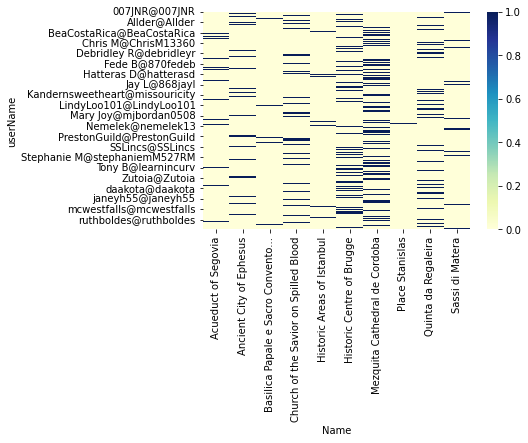

In [55]:
sns.heatmap(NameattuserNameMatrix, cmap='YlGnBu')
plt.show()

In [43]:
# Shape of the matrix
NameattuserNameMatrix.shape

(4084, 10)

## userName based recommendations
 ### Based on similar userNames' attractions visits

In [44]:
# Create a userName to userName similarity matrix
# Info on the "cosine" implementation https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine
userName_userName_sim_matrix = pd.DataFrame(
    pairwise_distances(NameattuserNameMatrix,metric='cosine'),
    columns = NameattuserNameMatrix.index,
    index = NameattuserNameMatrix.index
)
userName_userName_sim_matrix = userName_userName_sim_matrix.apply(lambda x: 1-x, axis=1) # Transform dissimilarity to similarity
userName_userName_sim_matrix

userName               007JNR@007JNR  101ramirez@101ramirez  1039@1039  \
userName                                                                 
007JNR@007JNR                    1.0                    1.0   0.000000   
101ramirez@101ramirez            1.0                    1.0   0.000000   
1039@1039                        0.0                    0.0   1.000000   
112HermanK@112HermanK            1.0                    1.0   0.000000   
1171fc@1171fc                    0.0                    0.0   0.000000   
...                              ...                    ...        ...   
ŒúŒ¨œÅŒ∏Œ± Œú@_T6960IQ                 1.0                    1.0   0.000000   
–ï–∫–∞—Ç–µ—Ä–∏–Ω–∞ –ì@_C5261QZ             0.0                    0.0   0.000000   
–ò–≤–∞–Ω@ivanishchenko               0.0                    0.0   0.707107   
–ö–∞—Ç–∞—Ä–∏–Ω–∞ –ü@reddreamer            0.0                    0.0   0.000000   
–†–∞–º–∏–ª—å –•@ramilk2013              0.0                    0.0   0.000000   

userName               112HermanK@112HermanK  1171fc@1171fc  \
userName                                                      
007JNR@007JNR                            1.0            0.0   
101ramirez@101ramirez                    1.0            0.0   
1039@1039                                0.0            0.0   
112HermanK@112HermanK                    1.0            0.0   
1171fc@1171fc                            0.0            1.0   
...                                      ...            ...   
ŒúŒ¨œÅŒ∏Œ± Œú@_T6960IQ                         1.0            0.0   
–ï–∫–∞—Ç–µ—Ä–∏–Ω–∞ –ì@_C5261QZ                     0.0            0.0   
–ò–≤–∞–Ω@ivanishchenko                       0.0            0.0   
–ö–∞—Ç–∞—Ä–∏–Ω–∞ –ü@reddreamer                    0.0            0.0   
–†–∞–º–∏–ª—å –•@ramilk2013                      0.0            0.0   

userName               123susan456@123susan456  1247912@1247912  14DLB@14DLB  \
userName                                                                       
007JNR@007JNR                              0.0              1.0          1.0   
101ramirez@101ramirez                      0.0              1.0          1.0   
1039@1039                                  0.0              0.0          0.0   
112HermanK@112HermanK                      0.0              1.0          1.0   
1171fc@1171fc                              0.0              0.0          0.0   
...                                        ...              ...          ...   
ŒúŒ¨œÅŒ∏Œ± Œú@_T6960IQ                           0.0              1.0          1.0   
–ï–∫–∞—Ç–µ—Ä–∏–Ω–∞ –ì@_C5261QZ                       0.0              0.0          0.0   
–ò–≤–∞–Ω@ivanishchenko                         0.0              0.0          0.0   
–ö–∞—Ç–∞—Ä–∏–Ω–∞ –ü@reddreamer                      0.0              0.0          0.0   
–†–∞–º–∏–ª—å –•@ramilk2013                        0.0              0.0          0.0   

userName               1527holiday1011@1527holiday1011  \
userName                                                 
007JNR@007JNR                                      0.0   
101ramirez@101ramirez                              0.0   
1039@1039                                          0.0   
112HermanK@112HermanK                              0.0   
1171fc@1171fc                                      0.0   
...                                                ...   
ŒúŒ¨œÅŒ∏Œ± Œú@_T6960IQ                                   0.0   
–ï–∫–∞—Ç–µ—Ä–∏–Ω–∞ –ì@_C5261QZ                               1.0   
–ò–≤–∞–Ω@ivanishchenko                                 0.0   
–ö–∞—Ç–∞—Ä–∏–Ω–∞ –ü@reddreamer                              0.0   
–†–∞–º–∏–ª—å –•@ramilk2013                                0.0   

userName               159terencej@159terencej  ...  ynwafoodie@ynwafoodie  \
userName                                        ...                          
007JNR@007JNR                         0.000000  ...                    1.0   
101ramirez@101ramirez                 0.000

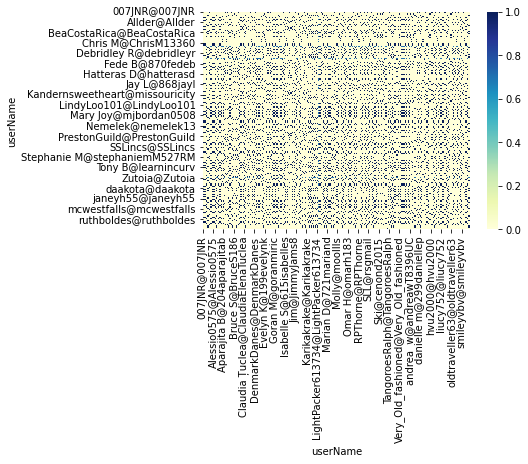

In [45]:
sns.heatmap(userName_userName_sim_matrix, cmap='YlGnBu')
plt.show()


In [46]:
# Check the matrix results
userName_userName_sim_matrix.head()

userName               007JNR@007JNR  101ramirez@101ramirez  1039@1039  \
userName                                                                 
007JNR@007JNR                    1.0                    1.0        0.0   
101ramirez@101ramirez            1.0                    1.0        0.0   
1039@1039                        0.0                    0.0        1.0   
112HermanK@112HermanK            1.0                    1.0        0.0   
1171fc@1171fc                    0.0                    0.0        0.0   

userName               112HermanK@112HermanK  1171fc@1171fc  \
userName                                                      
007JNR@007JNR                            1.0            0.0   
101ramirez@101ramirez                    1.0            0.0   
1039@1039                                0.0            0.0   
112HermanK@112HermanK                    1.0            0.0   
1171fc@1171fc                            0.0            1.0   

userName               123susan456@123susan456  1247912@1247912  14DLB@14DLB  \
userName                                                                       
007JNR@007JNR                              0.0              1.0          1.0   
101ramirez@101ramirez                      0.0              1.0          1.0   
1039@1039                                  0.0              0.0          0.0   
112HermanK@112HermanK                      0.0              1.0          1.0   
1171fc@1171fc                              0.0              0.0          0.0   

userName               1527holiday1011@1527holiday1011  \
userName                                                 
007JNR@007JNR                                      0.0   
101ramirez@101ramirez                              0.0   
1039@1039                                          0.0   
112HermanK@112HermanK                              0.0   
1171fc@1171fc                                      0.0   

userName               159terencej@159terencej  ...  ynwafoodie@ynwafoodie  \
userName                                        ...                          
007JNR@007JNR                         0.000000  ...                    1.0   
101ramirez@101ramirez                 0.000000  ...                    1.0   
1039@1039                             0.707107  ...                    0.0   
112HermanK@112HermanK                 0.000000  ...                    1.0   
1171fc@1171fc                         0.000000  ...                    0.0   

userName               yrf2016@yrf2016  zaxmo@zaxmo  zoeh198@zoeh198  zuv@zuv  \
userName                                                                        
007JNR@007JNR                 0.000000     0.000000              0.0      0.0   
101ramirez@101ramirez         0.000000     0.000000              0.0      0.0   
1039@1039                     0.707107     0.707107              0.0      0.0   
112HermanK@112HermanK         0.000000     0.000000              0.0      0.0   
1171fc@1171fc                 0.000000     0.000000              0.0      0.0   

userName               ŒúŒ¨œÅŒ∏Œ± Œú@_T6960IQ  –ï–∫–∞—Ç–µ—Ä–∏–Ω–∞ –ì@_C5261QZ  \
userName                                                        
007JNR@007JNR                       1.0                   0.0   
101ramirez@101ramirez               1.0                   0.0   
1039@1039                           0.0                   0.0   
112HermanK@112HermanK               1.0                   0.0   
1171fc@1171fc                       0.0                   0.0   

userName               –ò–≤–∞–Ω@ivanishchenko  –ö–∞—Ç–∞—Ä–∏–Ω–∞ –ü@reddreamer  \
userName                                                           
007JNR@007JNR                    0.000000                    0.0   
101ramirez@101ramirez            0.000000                    0.0   
1039@1039                        0.707107                    0.0   
112HermanK@112HermanK            0.000000                    0.0   
1171fc@1171fc                    0.000000                    0.

In [47]:
# Similar customers
userName_userName_sim_matrix.loc['112HermanK@112HermanK'].sort_values(ascending=False)

userName
007JNR@007JNR              1.0
Louis A@169louisa          1.0
MJL1965@MJL1965            1.0
M P@MPrasetyo              1.0
Lynda K@898lyndak          1.0
                          ... 
Biblioswiss@Biblioswiss    0.0
Lynn C@lynndyloowho        0.0
Lynn G@lynng439            0.0
Lynn J@lynnj977            0.0
–†–∞–º–∏–ª—å –•@ramilk2013        0.0
Name: 112HermanK@112HermanK, Length: 4084, dtype: float64

In [48]:
# Check locals visited by tripType A
nonZeroLocals = (NameattuserNameMatrix.loc['112HermanK@112HermanK'] !=0)
userNameA_ranked_for_Nameatt = set(NameattuserNameMatrix.columns[nonZeroLocals])
userNameA_ranked_for_Nameatt

{'Historic Centre of Brugge'}

In [49]:
# Check locals visited by tripType B
nonZeroLocals = (NameattuserNameMatrix.loc['1171fc@1171fc'] !=0)
userNameB_ranked_for_Nameatt = set(NameattuserNameMatrix.columns[nonZeroLocals])
userNameB_ranked_for_Nameatt

{'Church of the Savior on Spilled Blood'}

In [50]:
# Local to recommend to tripType B
userNameB_ranked_for_Nameatt = userNameA_ranked_for_Nameatt - userNameB_ranked_for_Nameatt
userNameB_ranked_for_Nameatt

{'Historic Centre of Brugge'}

## Based on Attraction Name Similarity

In [51]:
# Similiar Attraction Name matrix
Nameatt_Nameatt_sim_matrix = pd.DataFrame(
    pairwise_distances(NameattuserNameMatrix.T,metric='cosine'),
    columns = NameattuserNameMatrix.columns,
    index = NameattuserNameMatrix.columns
    )
Nameatt_Nameatt_sim_matrix = Nameatt_Nameatt_sim_matrix.apply(lambda x: 1-x, axis=1) # Transform dissimilarity to similarity
Nameatt_Nameatt_sim_matrix

Name                                   Acueduct of Segovia  \
Name                                                         
Acueduct of Segovia                               1.000000   
Ancient City of Ephesus                           0.000000   
Basilica Papale e Sacro Convento...               0.000000   
Church of the Savior on Spilled Blood             0.002542   
Historic Areas of Istanbul                        0.004195   
Historic Centre of Brugge                         0.002284   
Mezquita Cathedral de Cordoba                     0.026477   
Place Stanislas                                   0.000000   
Quinta da Regaleira                               0.002638   
Sassi di Matera                                   0.004765   

Name                                   Ancient City of Ephesus  \
Name                                                             
Acueduct of Segovia                                   0.000000   
Ancient City of Ephesus                               1.000000   
Basilica Papale e Sacro Convento...                   0.005172   
Church of the Savior on Spilled Blood                 0.010464   
Historic Areas of Istanbul                            0.017267   
Historic Centre of Brugge                             0.000000   
Mezquita Cathedral de Cordoba                         0.003353   
Place Stanislas                                       0.000000   
Quinta da Regaleira                                   0.002172   
Sassi di Matera                                       0.003923   

Name                                   Basilica Papale e Sacro Convento...  \
Name                                                                         
Acueduct of Segovia                                               0.000000   
Ancient City of Ephesus                                           0.005172   
Basilica Papale e Sacro Convento...                               1.000000   
Church of the Savior on Spilled Blood                             0.000000   
Historic Areas of Istanbul                                        0.012966   
Historic Centre of Brugge                                         0.003530   
Mezquita Cathedral de Cordoba                                     0.000000   
Place Stanislas                                                   0.000000   
Quinta da Regaleira                                               0.000000   
Sassi di Matera                                                   0.014729   

Name                                   Church of the Savior on Spilled Blood  \
Name                                                                           
Acueduct of Segovia                                                 0.002542   
Ancient City of Ephesus                                             0.010464   
Basilica Papale e Sacro Convento...                                 0.000000   
Church of the Savior on Spilled Blood                               1.000000   
Historic Areas of Istanbul                                          0.007870   
Historic Centre of Brugge                                           0.005714   
Mezquita Cathedral de Cordoba                                       0.003821   
Place Stanislas                                                     0.000000   
Quinta da Regaleira                                                 0.003300   
Sassi di Matera                                                     0.000000   

Name                                   Historic Areas of Istanbul  \
Name                                                                
Acueduct of Segovia                                      0.004195   
Ancient City of Ephesus                                  0.017267   
Basilica Papale e Sacro Convento...                      0.012966   
Church of the Savior on Spilled Blood                    0.007870   
Historic Areas of Istanbul                               1.000000   
Historic Centre of Brugge                                0.007072   
Mezquita Cat

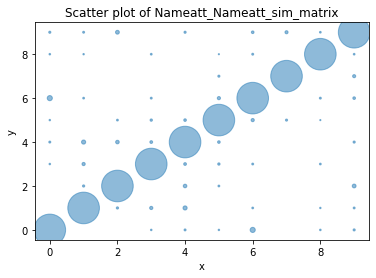

In [52]:
x = Nameatt_Nameatt_sim_matrix.columns
y = Nameatt_Nameatt_sim_matrix.index

x,y = np.meshgrid(range(Nameatt_Nameatt_sim_matrix.shape[1]), range(Nameatt_Nameatt_sim_matrix.shape[0]))
plt.scatter(x,y, s=Nameatt_Nameatt_sim_matrix.values*1000, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of Nameatt_Nameatt_sim_matrix')
plt.show()

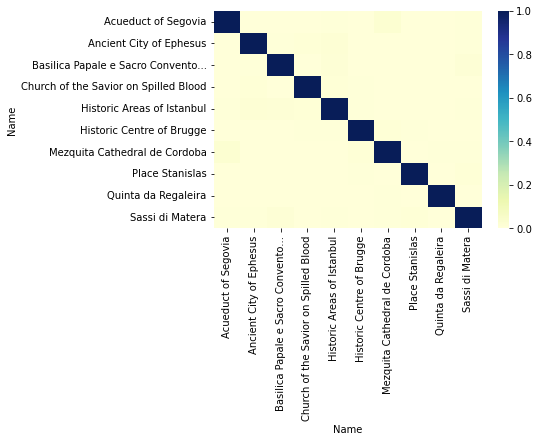

In [53]:
sns.heatmap(Nameatt_Nameatt_sim_matrix, cmap='YlGnBu')
plt.show()

In [54]:
# Top 3 attractions similar to 'Acueduct of Segovia '
top_3_similar_attractions = list(
    Nameatt_Nameatt_sim_matrix
        .loc['Acueduct of Segovia']
        .sort_values(ascending=False)
        .iloc[1:4]         # 1 to 4 instead of 0 to 10 because the first is the product itself
    .index
)
top_3_similar_attractions

['Mezquita Cathedral de Cordoba',
 'Sassi di Matera',
 'Historic Areas of Istanbul']